# Self Balancing Robot - PID Controller Simulation
João Victor Palhares Barbosa

## 1.0 Creating Proportional funcion of PID

In [1]:
def proportional(Kp, SP):
    """Creates proportional controllers with specified gain and setpoint."""
    MV = 0
    while True:
        PV = yield MV
        MV = Kp * (SP - PV)

## 2.0 Creating PID function

In [2]:
def PID(Kp, Ki, Kd, MV_bar=0):
    # initialize stored data
    e_prev = 0
    t_prev = -100
    I = 0
    
    # initial control
    MV = MV_bar
    
    while True:
        # yield MV, wait for new t, PV, SP
        t, PV, SP = yield MV
        
        # PID calculations
        e = SP - PV
        
        P = Kp*e
        I = I + Ki*e*(t - t_prev)
        D = Kd*(e - e_prev)/(t - t_prev)
        
        MV = MV_bar + P + I + D
        
        # update stored data for next iteration
        e_prev = e
        t_prev = t

## 3.0 Creating Generator of graphs
That will plot the PID data controller

In [3]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

def generator(kp, ki, kd):

    TCLab = setup(connected=False, speedup=10)

    controller = PID(kp, ki, kd)        # create pid control
    controller.send(None)               # initialize

    tfinal = 800

    with TCLab() as lab:
        h = Historian([('SP', lambda: SP), ('T1', lambda: lab.T1), ('MV', lambda: MV), ('Q1', lab.Q1)])
        p = Plotter(h, tfinal)
        T1 = lab.T1
        for t in clock(tfinal, 2):
            SP = T1 if t < 50 else 50           # get setpoint
            PV = lab.T1                         # get measurement
            MV = controller.send([t, PV, SP])   # compute manipulated variable
            lab.U1 = MV                         # apply 
            p.update(t)                         # update information display

## 4.0 Simulation of heuristic
Data generated by tests in real world
- kp = 22
- ki = 5
- kd = 1

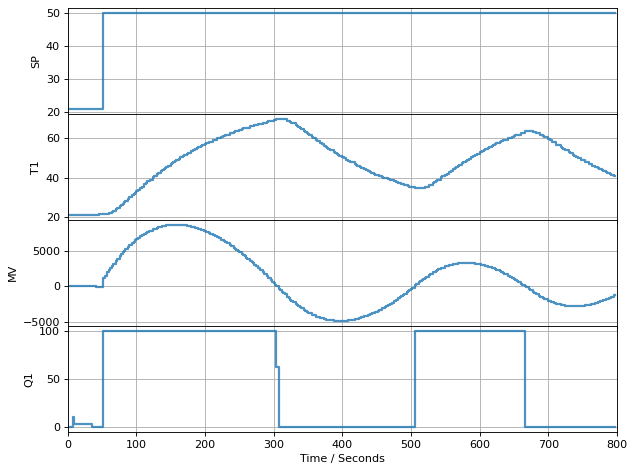

TCLab Model disconnected successfully.


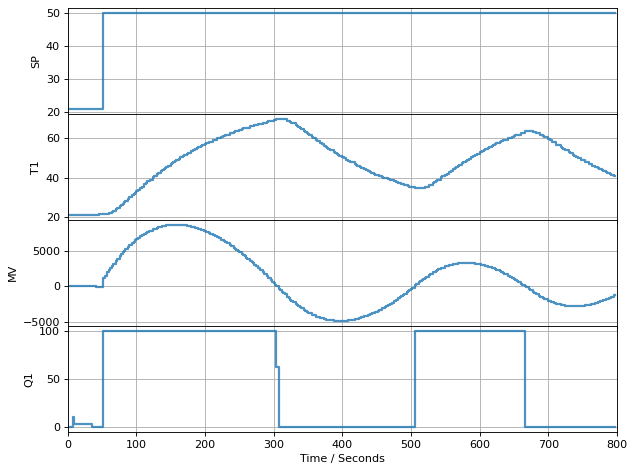

In [4]:
generator(22, 5, 1)

## 5.0 Simulation of Machine Learning based on heuristic
Data generated by tests on machine learning
- kp = 27
- ki = 3
- kd = 4

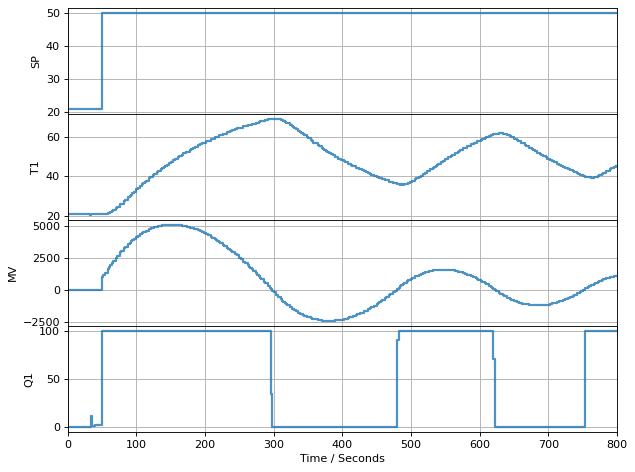

TCLab Model disconnected successfully.


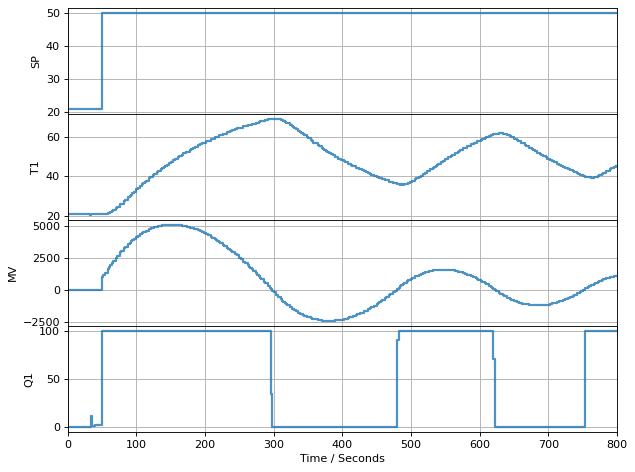

In [5]:
generator(27, 3, 4)